# Análise simples dos espaços de busca - BRKGA

## O Problema
O problema tratado nessa análise é o TSP (*Traveler Salesman Problem*). Este é um problema de Otimização Combinatória do tipo NP-Completo. Como já sabemos muito bem do que se trata, vamos ao que importa: sua solução é dita permutacional, onde todas as cidades podem ser representadas num vetor e cada solução possível é alcançada permutando-se as posições.

## Geração da população inicial
O BRKGA trabalha com o conceito de população, onde uma população inicial é gerada aleatoriamente. Cada indivíduo da população (uma solução com seu respectivo valor) é representado por um cromossomo de tamanho *n*, onde cada posição do cromossomo corresponde a um alelo. No BRKGA, o valor dos alelos corresponde à uma **chave aleatória**.

No exemplo abaixo, temos a geração da população inicial de 10 cromossomos com 10 alelos cada.

In [1]:
import numpy as np
import pandas as pd
from operator import itemgetter
%matplotlib inline

# gerando populacao de cromossomos com chaves aleatorias
pop = np.random.rand(10, 10)
pop

array([[0.37881477, 0.31996112, 0.53174238, 0.65324478, 0.10725757,
        0.04695894, 0.14900769, 0.92487158, 0.29038228, 0.48313591],
       [0.70483155, 0.70139393, 0.15916656, 0.87722634, 0.28232699,
        0.01559615, 0.0790968 , 0.34201595, 0.74701442, 0.16611345],
       [0.38162679, 0.4409586 , 0.73558096, 0.15128092, 0.90806914,
        0.23781699, 0.57564331, 0.37801346, 0.03415059, 0.52337729],
       [0.5275722 , 0.81534424, 0.15513136, 0.82683934, 0.56841604,
        0.23644391, 0.83369711, 0.93638046, 0.95868942, 0.39934363],
       [0.90858329, 0.24740438, 0.84430072, 0.52653962, 0.99485827,
        0.9399919 , 0.26727768, 0.9330267 , 0.45812358, 0.28522315],
       [0.78138297, 0.1594094 , 0.38113974, 0.13071421, 0.04096819,
        0.48028347, 0.26520161, 0.4655342 , 0.71032214, 0.57064601],
       [0.7542884 , 0.99263685, 0.84813697, 0.59319225, 0.63865952,
        0.18792493, 0.34383219, 0.18528072, 0.09022157, 0.72403951],
       [0.21802402, 0.3983122 , 0.9365562

## Função de decodificação
As chaves aleatórias representam um espaço de busca reduzido em relação ao problema. Para utilizar o BRKGA, é necessário uma função de decodificação. Para esse problema específicio (TSP) a função de decodificação dar-se-á da seguinte maneira:
* Inicialmente cada chave aleatória é associada em ordem ascendente, formando-se um par chave-valor;
* Uma vez definidos os pares chave-valor, o vetor de pares formado é ordenado de acordo a chave aleatória;
* A posição dos valores, agora permutados, definem a solução decodificada.

Abaixo o código que efetua a formação dos pares, o ordenamento e consequente obtenção das soluções decodificadas.

In [2]:
# criando par chave valor para cada um dos alelos dos cromossomos
par_chave_valor = []
for cromossomo in pop:
    par_chave_valor.append(zip(cromossomo, range(0, len(cromossomo))))

In [3]:
# ordenando os arrays de acordo com o valor da chave aleatoria
chaves_ordenadas = []
for item in par_chave_valor:
    chaves_ordenadas.append(sorted(list(item), key = itemgetter(0), reverse = True))

chaves_ordenadas[0]

[(0.9248715761424477, 7),
 (0.6532447812840824, 3),
 (0.5317423841705747, 2),
 (0.4831359086239084, 9),
 (0.3788147651144429, 0),
 (0.3199611224407056, 1),
 (0.29038227521128146, 8),
 (0.14900769091879684, 6),
 (0.10725757060313046, 4),
 (0.04695893818178842, 5)]

In [4]:
# separando arrays de chave valor
array_solucoes = []

# vetor de solucoes no espaco de busca do problema
solucao_real = []

# vetor de solucoes no espaco de busca codificado
solucao_codificada = []

for item in chaves_ordenadas:
    array_solucoes.append(list(zip(*item)))

for item in array_solucoes:
    solucao_codificada.append(list(item)[0])
    solucao_real.append(list(item)[1])

print(solucao_codificada[0])
print(solucao_real[1])

(0.9248715761424477, 0.6532447812840824, 0.5317423841705747, 0.4831359086239084, 0.3788147651144429, 0.3199611224407056, 0.29038227521128146, 0.14900769091879684, 0.10725757060313046, 0.04695893818178842)
(3, 8, 0, 1, 7, 4, 9, 2, 6, 5)


## Cálculo das distâncias
Uma vez obtidas as soluções em seus respectivos espaços de busca, agora vamos organizá-las a fim de calcular as suas distâncias. Os datasets abaixo representam as soluções em seus respectivos espaços de busca.
Mais abaixo, os datasets contendo as distâncias entre cada solução.

In [5]:
df_codificado = pd.DataFrame(data=pop)
df_codificado

0         1         2         3         4         5         6  \
0  0.378815  0.319961  0.531742  0.653245  0.107258  0.046959  0.149008   
1  0.704832  0.701394  0.159167  0.877226  0.282327  0.015596  0.079097   
2  0.381627  0.440959  0.735581  0.151281  0.908069  0.237817  0.575643   
3  0.527572  0.815344  0.155131  0.826839  0.568416  0.236444  0.833697   
4  0.908583  0.247404  0.844301  0.526540  0.994858  0.939992  0.267278   
5  0.781383  0.159409  0.381140  0.130714  0.040968  0.480283  0.265202   
6  0.754288  0.992637  0.848137  0.593192  0.638660  0.187925  0.343832   
7  0.218024  0.398312  0.936556  0.889192  0.971307  0.386379  0.050039   
8  0.072608  0.026646  0.018521  0.749817  0.623945  0.798301  0.773147   
9  0.233970  0.144470  0.657425  0.971719  0.759359  0.738463  0.485616   

          7         8         9  
0  0.924872  0.290382  0.483136  
1  0.342016  0.747014  0.166113  
2  0.378013  0.034151  0.523377  
3  0.936380  0.958689  0.399344  
4  0.933027  0.458124  0.285223  
5  0.465534  0.710322  0.570646  
6  0.185281  0.090222  0.724040  
7  0.806407  0.710567  0.641877  
8  0.530333  0.276422  0.672066  
9  0.175039  0.598988  0.861337

In [6]:
df_problema = pd.DataFrame(data=solucao_real)
df_problema

0  1  2  3  4  5  6  7  8  9
0  7  3  2  9  0  1  8  6  4  5
1  3  8  0  1  7  4  9  2  6  5
2  4  2  6  9  1  0  7  5  3  8
3  8  7  6  3  1  4  0  9  5  2
4  4  5  7  0  2  3  8  9  6  1
5  0  8  9  5  7  2  6  1  3  4
6  1  2  0  9  4  3  6  5  7  8
7  4  2  3  7  8  9  1  5  0  6
8  5  6  3  9  4  7  8  0  1  2
9  3  9  4  5  2  8  6  0  7  1

In [7]:
matriz_codificado_distancias = []
codificado_distancias = []
for x in pop:
    for y in pop:
        codificado_distancias.append(np.linalg.norm(np.array(x) - np.array(y)))
    matriz_codificado_distancias.append(codificado_distancias)
    codificado_distancias = []

df_codificado_distancias = pd.DataFrame(matriz_codificado_distancias)
df_codificado_distancias

0         1         2         3         4         5         6  \
0  0.000000  1.061139  1.238644  1.269119  1.437487  1.041259  1.297110   
1  1.061139  0.000000  1.534972  1.095205  1.638466  1.181200  1.279298   
2  1.238644  1.534972  0.000000  1.522713  1.268056  1.318809  0.927654   
3  1.269119  1.095205  1.522713  0.000000  1.514637  1.415597  1.512862   
4  1.437487  1.638466  1.268056  1.514637  0.000000  1.371124  1.472757   
5  1.041259  1.181200  1.318809  1.415597  1.371124  0.000000  1.436127   
6  1.297110  1.279298  0.927654  1.512862  1.472757  1.436127  0.000000   
7  1.157112  1.410558  1.253363  1.349241  1.095842  1.516620  1.322862   
8  1.365686  1.617081  1.295163  1.371425  1.495906  1.391592  1.680517   
9  1.409341  1.495844  1.242682  1.463445  1.329980  1.376995  1.336164   

          7         8         9  
0  1.157112  1.365686  1.409341  
1  1.410558  1.617081  1.495844  
2  1.253363  1.295163  1.242682  
3  1.349241  1.371425  1.463445  
4  1.095842  1.495906  1.329980  
5  1.516620  1.391592  1.376995  
6  1.322862  1.680517  1.336164  
7  0.000000  1.449251  0.983497  
8  1.449251  0.000000  0.931696  
9  0.983497  0.931696  0.000000

In [8]:
matriz_problema_distancias = []
problema_distancias = []
for x in solucao_real:
    for y in solucao_real:
        problema_distancias.append(np.linalg.norm(np.array(x) - np.array(y)))
    matriz_problema_distancias.append(problema_distancias)
    problema_distancias = []

df_problema_distancias = pd.DataFrame(matriz_problema_distancias)
df_problema_distancias

0          1          2          3          4          5  \
0   0.000000  13.711309   6.324555  12.727922  12.489996  14.832397   
1  13.711309   0.000000  14.832397  15.556349  12.328828  11.401754   
2   6.324555  14.832397   0.000000  14.071247  13.266499  12.247449   
3  12.727922  15.556349  14.071247   0.000000   9.899495  15.033296   
4  12.489996  12.328828  13.266499   9.899495   0.000000  12.884099   
5  14.832397  11.401754  12.247449  15.033296  12.884099   0.000000   
6   9.165151  11.916375   8.944272  15.748016  14.899664  13.856406   
7  14.491377  14.764823  13.856406  14.071247  16.492423  14.000000   
8  10.954451  11.747340  12.247449  15.297059  15.033296  11.313708   
9  13.784049  10.198039  15.033296  13.266499  12.727922  11.045361   

           6          7          8          9  
0   9.165151  14.491377  10.954451  13.784049  
1  11.916375  14.764823  11.747340  10.198039  
2   8.944272  13.856406  12.247449  15.033296  
3  15.748016  14.071247  15.297059  13.266499  
4  14.899664  16.492423  15.033296  12.727922  
5  13.856406  14.000000  11.313708  11.045361  
6   0.000000  12.328828  12.569805  13.711309  
7  12.328828   0.000000  11.489125  14.696938  
8  12.569805  11.489125   0.000000   8.717798  
9  13.711309  14.696938   8.717798   0.000000

## Gráficos de distância
Por fim, dois gráficos mostrando a distâncias entre as soluções em seus respectivos espaços.

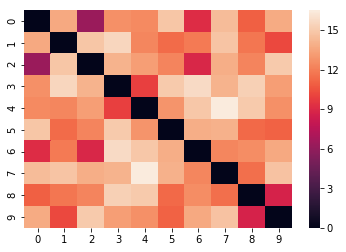

In [9]:
import seaborn as sns

ax = sns.heatmap(df_problema_distancias.T)

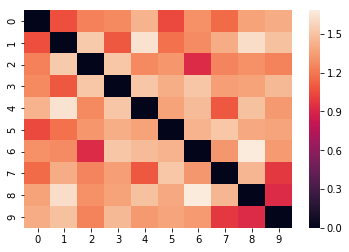

In [10]:
bx = sns.heatmap(df_codificado_distancias.T)